In [1]:
#Import necessary libraries and the dataset
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima.model import ARIMA
from numpy import log
from pandas import DataFrame
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('time_series2.csv',index_col ='Date', parse_dates = True)

Text(0.5, 1.0, 'Daily Revenue')

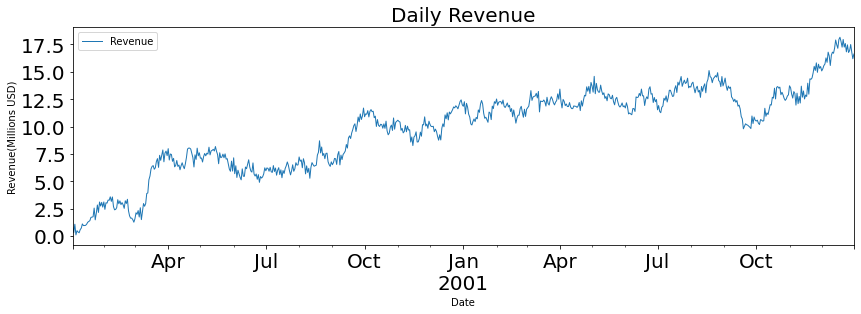

In [2]:
#Visualize the daily revenue
#Upward trend is apparent 
df.plot(figsize=(14,4), linewidth=1, fontsize=20)
plt.ylabel('Revenue(Millions USD)',fontsize=10)
plt.title('Daily Revenue',fontsize=20) 

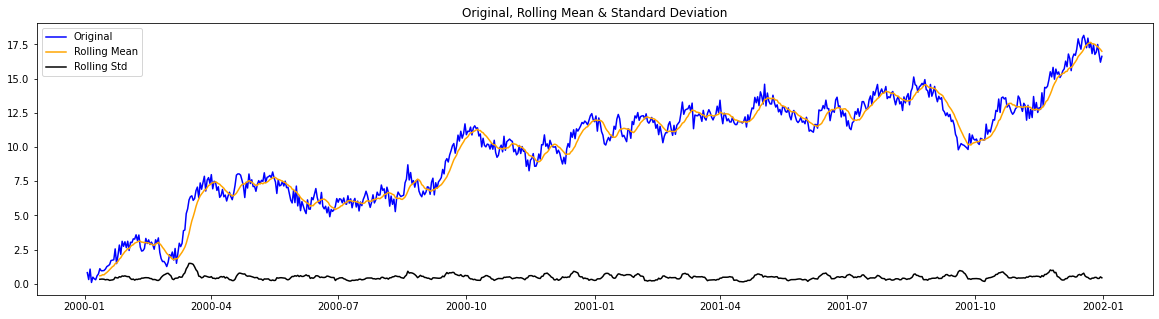

In [3]:
#Rolling mean of the revenue with a window of 10 taking the average of the data before and after
#that point in the window. This smooths out the noise and you can look for trends
#Source (Gulyvz, Time Series Forecasting and Analysis- Part 1 2020)
rolmean = df['Revenue'].rolling(window=10).mean() 
#window size 24 denotes 24 hour, giving rolling mean at daily level
rolstd = df['Revenue'].rolling(window=10).std()  
plt.figure(figsize=(20,5))
orig = plt.plot(df['Revenue'], color='blue', label='Original')
mean = plt.plot(rolmean, color='orange', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Original, Rolling Mean & Standard Deviation')
plt.show(block=False);

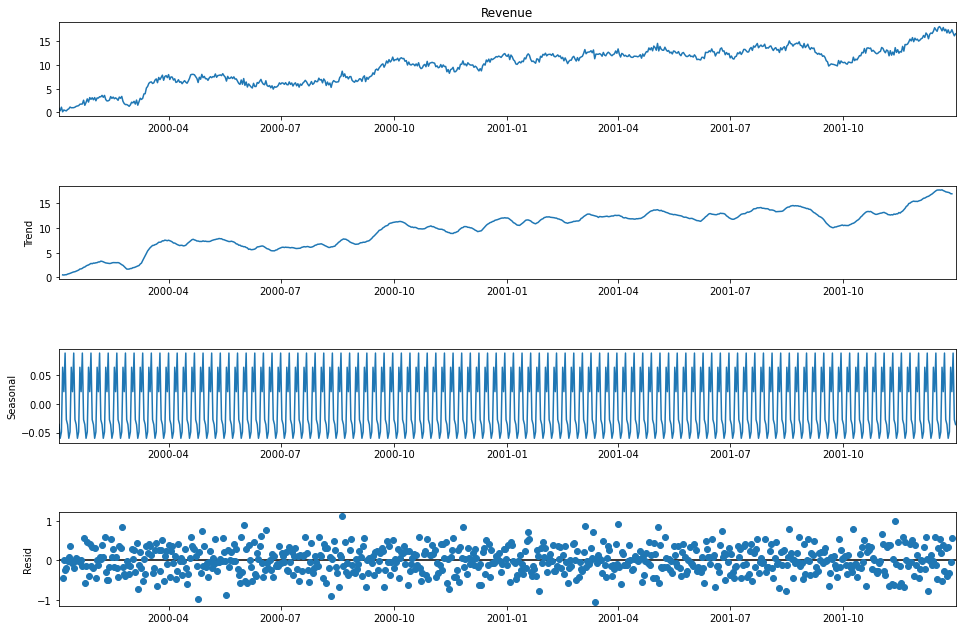

In [4]:
#Decompose the data to look for stationarity. The decomposed time series shows the upward trend 
#seasonality is apparent but there are no apparent trends in the residuals. 
#Source (Brownlee, How to Decompose Time Series Data into Trend and Seasonality 2020)
from statsmodels.tsa.seasonal import seasonal_decompose
time_series=df['Revenue']
type(time_series)
decomp= seasonal_decompose(time_series)
fig= decomp.plot()
fig.set_size_inches(15,10)

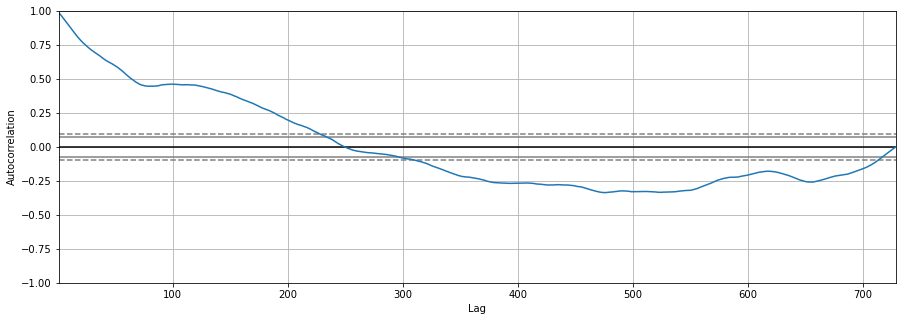

In [5]:
#Show autocorrelation. The dotted line show statistical significance. 
#(Brownlee, How to Create an ARIMA Model for Time Series Forecasting in Python 2020)
plt.figure(figsize=(15,5))
autocorrelation_plot(df)
plt.show() 

In [6]:
df.to_csv('D213Task1.csv')

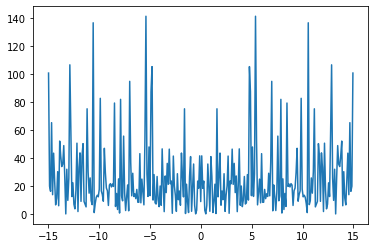

In [7]:
#Spectral Density can help find underlying periodicities. 
#Indicating that it is not stationary.
#Source (Python: ARIMA Model for Time Series Forecasting 2020)
from __future__ import division
data = np.random.rand(301) - 0.5
ps = np.abs(np.fft.fft(data))**2
time_step = 1 / 30
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)
plt.plot(freqs[idx], ps[idx])

Text(0.5, 1.0, 'Data Differenced')

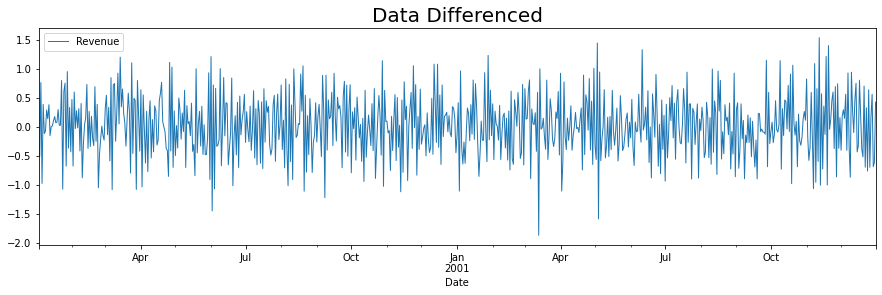

In [8]:
#Plotting the differenced data to see if there is still a trend
df1=df.diff().plot(figsize=(15,4), linewidth=1, fontsize=10)
df1.plot()
plt.title('Data Differenced',fontsize=20) 

Text(0.5, 1.0, 'Log plotted to look for improved Stationarity')

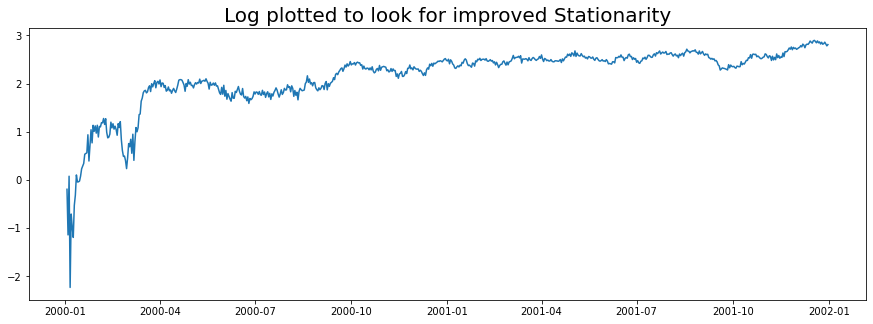

In [9]:
#Plot the log of the data and differenced to remove trend and variance
plt.figure(figsize=(15,5))
df2=(np.log(df))
plt.plot(df2)
plt.title('Log plotted to look for improved Stationarity',fontsize=20) 

Text(0.5, 1.0, 'Log and difference plotted to look for improved Stationarity')

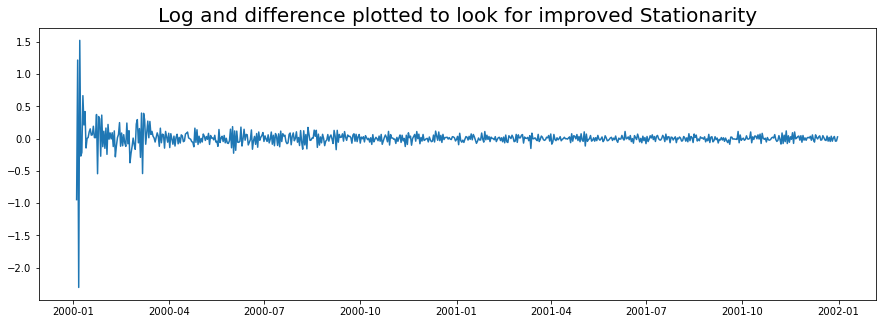

In [10]:
 #Plot the log of the data and differenced to remove trend and variance
#Source (ARIMA and Python: Stock Price Forecasting using statsmodels 2017)
plt.figure(figsize=(15,5))
df3=(np.log(df).diff())
plt.plot(df3)
plt.title('Log and difference plotted to look for improved Stationarity',fontsize=20) 

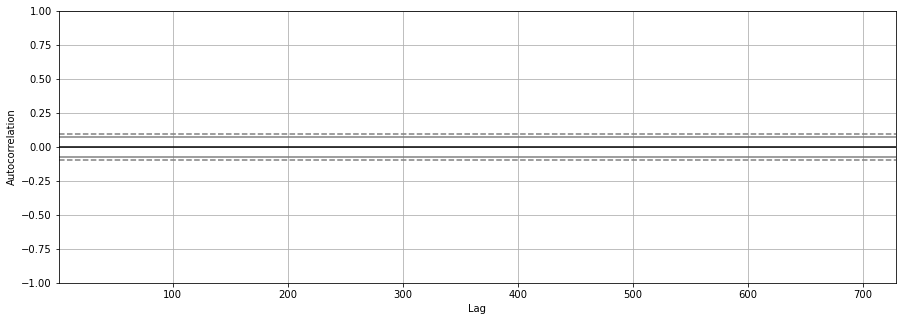

In [11]:
#Show autocorrelation. The dotted line show statistical significance. 
# Source (Brownlee, How to Create an ARIMA Model for Time Series Forecasting in Python 2020)
plt.figure(figsize=(15,5))
autocorrelation_plot(df3)
plt.show()

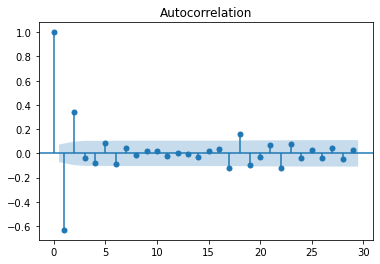

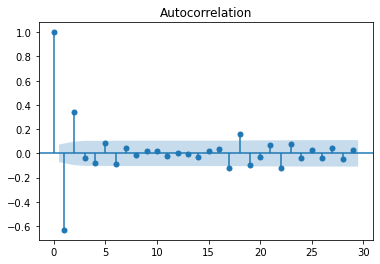

In [12]:
#View values outside the confidence intervals (blue areas). 
#Autocorrelation suggests values for AR 
#Source (Transforming features for better clusterings: Python)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df3.dropna()) 

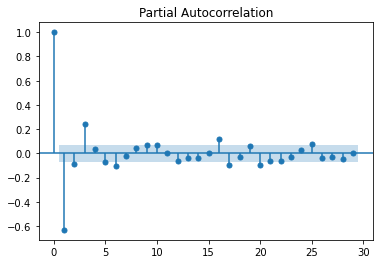

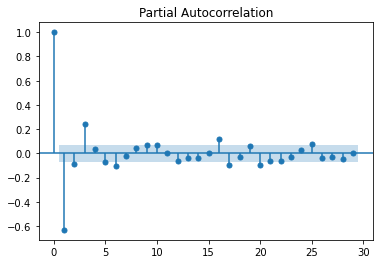

In [13]:
#Partial AR suggests values for MA
plot_pacf(df3.dropna())

In [14]:
df3.dropna(how='any', inplace=True)

In [15]:
X = df3.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.489187
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [16]:
# Use AutoArima to find best values
#Source (Transforming features for better clusterings: Python)
AutoA = auto_arima(df3['Revenue'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12,start_P = 0, 
                   seasonal = True, d = None, D = 1, trace = True, error_action ='ignore',suppress_warnings = True,
                   stepwise = True)           
AutoA.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-498.647, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-955.893, Time=0.62 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-500.644, Time=0.16 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-800.480, Time=0.23 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-1028.397, Time=1.95 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.61 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-612.778, Time=1.79 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-1026.772, Time=3.13 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=-1026.630, Time=7.43 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-876.344, Time=3.36 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=-1032.957, Time=7.96 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  728
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 540.230
Date:                            Mon, 05 Jul 2021   AIC                          -1068.460
Time:                                    22:18:11   BIC                          -1041.018
Sample:                                         0   HQIC                         -1057.863
                                            - 728                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6944      0.020    -34.286      0.000      -0.734      -0.655
ar.L2          0.1271      0.024      5.352      0.000       0.081       0.174
ar.L3          0.3087      0.024     12.893      0.000       0.262       0.356
ar.S.L12      -0.8511      0.013    -65.962      0.000      -0.876      -0.826
ar.S.L24      -0.4794      0.013    -37.841      0.000      -0.504      -0.455
sigma2         0.0127      0.000     50.231      0.000       0.012       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             17841.33
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             1.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
#Source (Transforming features for better clusterings: Python)
model = ARIMA(df3, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  728
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 492.676
Date:                Mon, 05 Jul 2021   AIC                           -979.351
Time:                        22:18:12   BIC                           -965.584
Sample:                    01-04-2000   HQIC                          -974.039
                         - 12-31-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3512      0.006   -242.106      0.000      -1.362      -1.340
ar.L2         -0.7288      0.007   -111.486      0.000      -0.742      -0.716
sigma2         0.0150      0.000     53.989      0.0

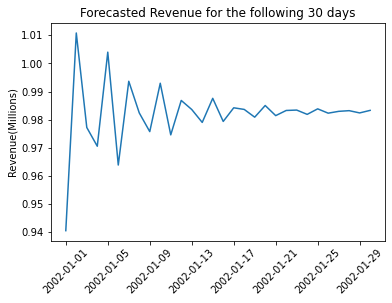

In [18]:
#Source (Transforming features for better clusterings: Python)
output = model_fit.forecast(steps=30)
adjusted=np.exp(output)
adjusted
plt.plot(adjusted)
plt.ylabel('Revenue(Millions)')
plt.xticks(rotation=45)
plt.title('Forecasted Revenue for the following 30 days')
plt.show()

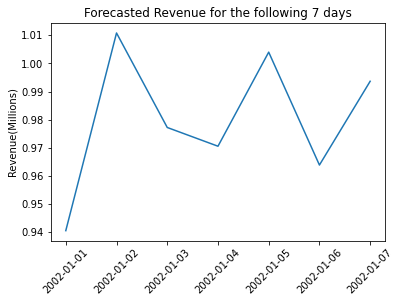

In [19]:
#Source (Transforming features for better clusterings: Python)
output = model_fit.forecast(steps=7)
adjusted=np.exp(output)
adjusted
plt.plot(adjusted)
plt.ylabel('Revenue(Millions)')
plt.xticks(rotation=45)
plt.title('Forecasted Revenue for the following 7 days')
plt.show()